# Introduction to Programmatic Business Analytics Assignment
Utilizing the Bike Sharing Dataset from the UCI Machine Learning Repository, demonstrate your data science and machine learning skills to extract insights and predict bike rental demand. The dataset can be accessed directly via the provided URL and code.

In the cell below, we'll import all the packages needed for this assignment.

*Make sure you run this cell before proceeding with the rest of the notebook to avoid any import-related errors.*

In [2]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Task 1: Data Wrangling and Exploration
### 1.1 Load the Dataset
Use the provided code to download and extract the dataset directly from the given URL into a pandas DataFrame.

In [4]:
# Download and extract the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
zip_file = requests.get(url)
zip_file = ZipFile(BytesIO(zip_file.content))
df = pd.read_csv(zip_file.open('day.csv'))

### 1.2 Initial Inspection and Cleaning
Perform an initial inspection by methods like head, info, shape to understand the dataset's structure and content.
Check for missing values and handle them appropriately, if any.

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# to know which coulmns  we have and the name of them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# To get an idea how is our data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# To know if there is any null in each columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 1.3 data preparation
- 1.3.1 Convert dteday to a datetime object.
- 1.3.2 Extract year, month, day and daysofweek from dteday and add them as seperate columns to the dataframe.
- 1.3.3 Normalize the temp, atemp, hum, and windspeed features using MinMaxScaler
- 1.3.4 Encode the season, yr, mnth, holiday, weekday, workingday, and weathersit columns as categorical variables.
- 1.3.5 Check the data after the transformation

In [9]:
# 1.3.1 Converting dteday to a datetime object

df['dteday'] = pd.to_datetime(df['dteday'])
print(df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [10]:

df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['dayofweek'] = df['dteday'].dt.dayofweek  # Monday is 0, Sunday is 6

# Display the DataFrame with the new columns
print(df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  year  month  day  dayofweek  
0   985  2011      1    1          5  
1   801  2011 

In [11]:
# 1.3.2 Extract year, month, day and daysofweek from dteday and add them as seperate columns to the dataframe

df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['dayofweek'] = df['dteday'].dt.dayofweek  # Monday is 0, Sunday is 6

# Display the DataFrame with the new columns
print(df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  year  month  day  dayofweek  
0   985  2011      1    1          5  
1   801  2011 

In [12]:
selected_columns_to_normal = ['temp', 'atemp', 'hum', 'windspeed']
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[selected_columns_to_normal] = scaler.fit_transform(df[selected_columns_to_normal])

print(df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.355170  0.373517  0.828620   0.284606     331         654   
1           2  0.379232  0.360541  0.715771   0.466215     131         670   
2           1  0.171000  0.144830  0.449638   0.465740     120        1229   
3           1  0.175530  0.174649  0.607131   0.284297     108        1454   
4           1  0.209120  0.197158  0.449313   0.339143      82        1518   

    cnt  year  month  day  dayofweek  
0   985  2011      1    1          5  
1   801  2011 

In [13]:
# 1.3.4 Encode the season, yr, mnth, holiday, weekday, workingday, and weathersit columns as categorical variables.
#since machine learning models work with numbers we have to make these columns as categorical

selected_columns_to_encode = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Loop through each column and encode as category
for column in selected_columns_to_encode:
    df[column] = df[column].astype('category')

print(df.head())

   instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  year  \
0  0.355170  0.373517  0.828620   0.284606     331         654   985  2011   
1  0.379232  0.360541  0.715771   0.466215     131         670   801  2011   
2  0.171000  0.144830  0.449638   0.465740     120        1229  1349  2011   
3  0.175530  0.174649  0.607131   0.284297     108        1454  1562  2011   
4  0.209120  0.197158  0.449313   0.339143      82        1518  1600  2011   

   month  day  dayofweek  
0      1    1          5  
1      1

### 1.4 visualizing the distribution of bike rentals (cnt) across different time granularities and categorical variables.
Conduct a comprehensive exploratory data analysis on the dataset, focusing on the distribution of bike rentals (cnt) across various dimensions and conditions. The analysis should reveal how bike rentals vary over different months, days of the week, seasons, holidays, working days, and weather situations.

The analysis should utilize Seaborn for creating visualizations, and these should be organized into a multi-panel figure using Matplotlib's subplot functionality. Each subplot is to represent a different aspect of the data:
1. Total bike rentals per month - Presented as a bar plot.
2. Total bike rentals per day of the week - Presented as a bar plot.
3. Bike rentals distribution per season - Displayed using a box plot.
4. Bike rentals on holidays vs. non-holidays - Illustrated with a box plot.
5. Bike rentals on working days vs. non-working days - Visualized through a box plot.
6. Bike rentals across different weather situations - Depicted with a box plot.

All plots should be appropriately titled and laid out for readability and visual appeal. Additionally, a consistent white grid style should be applied to all plots for uniformity

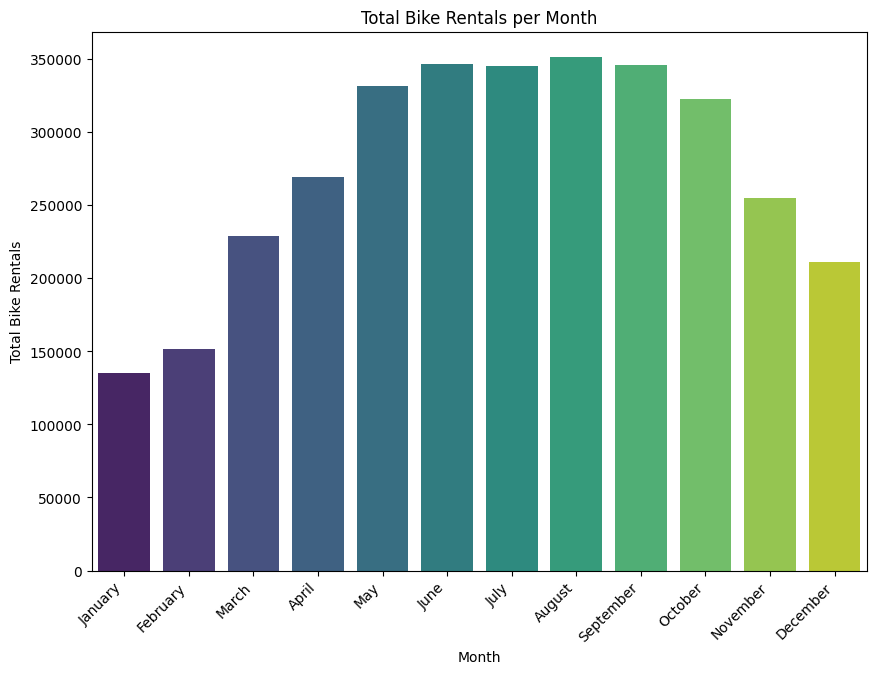

In [14]:
#cnt cor count for each month.

# To show the name of the months on the X axis not just the number of month
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group by month and calculate the total bike rentals
monthly_totals = df.groupby('mnth')['cnt'].sum().reset_index()

# Plotting using seaborn
monthly_totals['mnth'] = monthly_totals['mnth'].map(month_mapping)


plt.figure(figsize=(10, 7))
sns.barplot(x='mnth', y='cnt', data=monthly_totals, palette='viridis')
plt.title('Total Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')

# Rotate x-axis for 45 degree to make more readible
plt.xticks(rotation=45, ha='right')

plt.show()


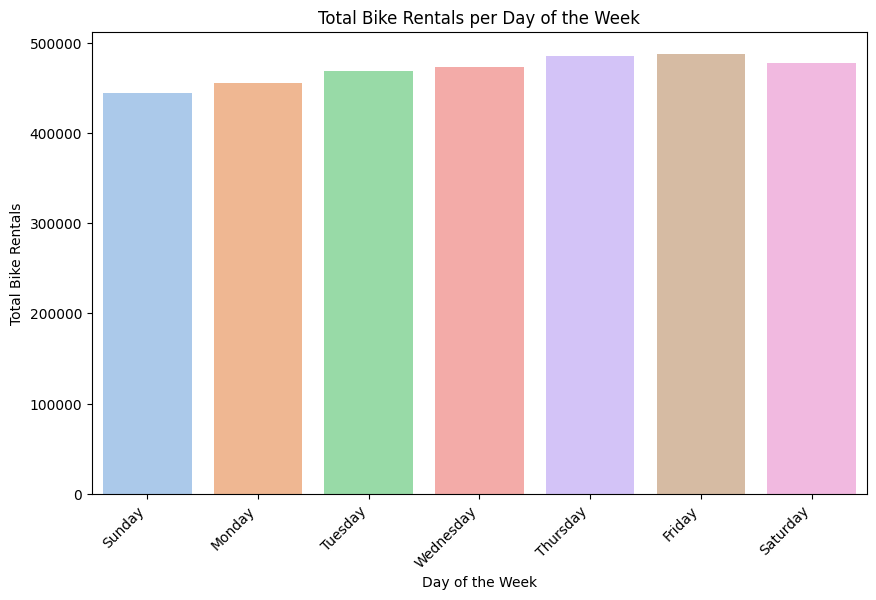

In [15]:
#Total bike rentals per day of the week - Presented as a bar plot.

# Create a dictionary to map weekday numbers to weekday names
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Group by weekday and calculate the total bike rents for those days
weekday_totals = df.groupby('weekday')['cnt'].sum().reset_index()

# Map weekday numbers to weekday names
weekday_totals['weekday'] = weekday_totals['weekday'].map(weekday_mapping)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_totals, palette='pastel')
plt.title('Total Bike Rentals per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

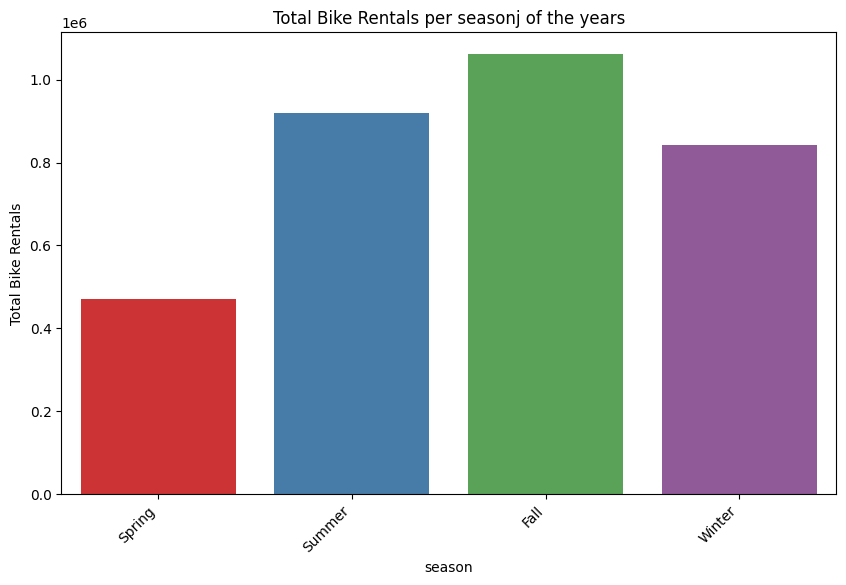

In [16]:
#Total bike rentals per day of the week - Presented as a bar plot.

# Create a dictionary to map seasons numbers to season names
season_mapping = {
     1: 'Spring', 2: 'Summer', 3: 'Fall', 4 : 'Winter'}

# Group by season and calculate the total bike rents for those season
season_totals = df.groupby('season')['cnt'].sum().reset_index()

# Map weekday numbers to weekday names
season_totals['season'] =  season_totals['season'].map(season_mapping)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_totals, palette='Set1')
plt.title('Total Bike Rentals per seasonj of the years')
plt.xlabel('season')
plt.ylabel('Total Bike Rentals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

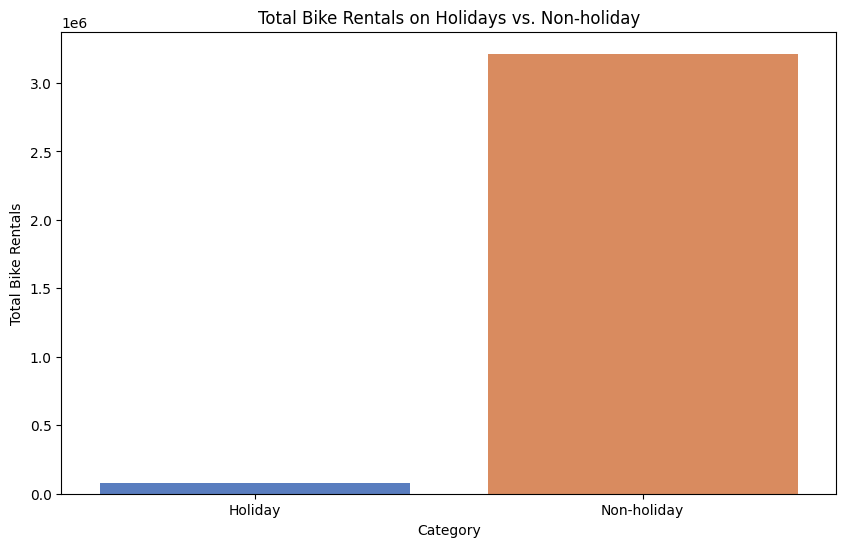

In [17]:
# Bike rentals on holidays vs. non-holidays - Illustrated with a box plot.

#Total bike rentals per day Holiday and working day

# Group by  non-Holiday or working day  and calculate the total bike rents in thses days
total_rents_on_holiday = df[df['holiday'] == 1]['cnt'].sum()

# Group by Holiday  and calculate the total bike rents in thses days
total_rents_on_non_holiday = df[df['holiday'] == 0]['cnt'].sum()

total_rentals_data = pd.DataFrame({
    'Category': ['Holiday', 'Non-holiday'],
    'Total Rentals': [total_rents_on_holiday, total_rents_on_non_holiday]
})

# Plotting using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Rentals', data=total_rentals_data, palette='muted')
plt.title('Total Bike Rentals on Holidays vs. Non-holiday')
plt.xlabel('Category')
plt.ylabel('Total Bike Rentals')

plt.show()

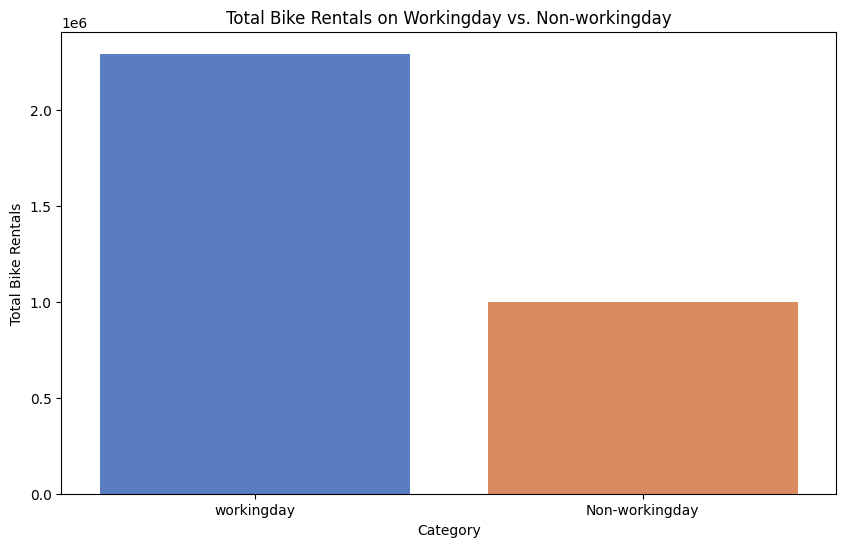

In [18]:
# Bike rentals on working days vs. non-working days - Visualized through a box plot.

#Total bike rentals per day workingday and non working day

# Group by  non-Holiday or working day  and calculate the total bike rents in thses days
total_rents_on_workingday = df[df['workingday'] == 1]['cnt'].sum()

# Group by Holiday  and calculate the total bike rents in thses days
total_rents_on_non_workingday = df[df['workingday'] == 0]['cnt'].sum()

total_rentals_data = pd.DataFrame({
    'Category': ['workingday', 'Non-workingday'],
    'Total Rentals': [total_rents_on_workingday, total_rents_on_non_workingday]
})

# Plotting using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Rentals', data=total_rentals_data, palette='muted')
plt.title('Total Bike Rentals on Workingday vs. Non-workingday')
plt.xlabel('Category')
plt.ylabel('Total Bike Rentals')

plt.show()

In [19]:
# To know the range of our weathersit column

df['weathersit'] = df['weathersit'].astype('category').cat.as_ordered()

# Find the minimum and maximum values
min_weathersit = df['weathersit'].min()
max_weathersit = df['weathersit'].max()

print(f'Minimum Weathersit: {min_weathersit}')
print(f'Maximum Weathersit: {max_weathersit}')

Minimum Weathersit: 1
Maximum Weathersit: 3


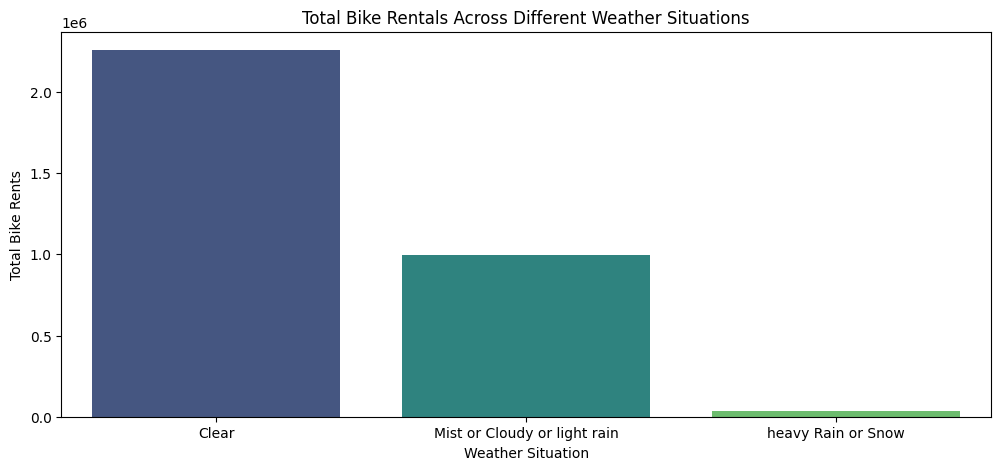

In [20]:
# Create a dictionary to map weathersit numbers to weather names
weather_mapping = {
    1: 'Clear', 2: 'Mist or Cloudy or light rain', 3: 'heavy Rain or Snow'
}

# Map weathersit numbers to weather names
df['weather_name'] = df['weathersit'].map(weather_mapping)

# Calculate the total bike rentals for each weather situation
weather_totals = df.groupby('weather_name')['cnt'].sum().reset_index()

# Plotting using seaborn barplot
plt.figure(figsize=(12, 5 ))
sns.barplot(x='weather_name', y='cnt', data=weather_totals, palette='viridis')
plt.title('Total Bike Rentals Across Different Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rents')

plt.show()

## Task 2: Statistical Analysis and Predictive Modeling

### 2.1 Descriptive and Inferential Statistical Analysis
Perform a detailed statistical analysis on a subset of features from the Bike Sharing dataset. The focus should be on understanding the relationships and characteristics of key numerical variables, including temperature (temp), feeling temperature (atemp), humidity (hum), wind speed (windspeed), and total bike rentals (cnt).

The following steps should be taken in the analysis:

1. Feature Selection: Extract a subset of the dataset containing only the columns temp, atemp, hum, windspeed, and cnt.
2. Descriptive Statistics: Generate the descriptive statistics (such as mean, median, standard deviation, etc.) for these selected features. This will provide an overview of the central tendency and spread of the data.
3. Inferential Statistics: Compute the correlation matrix for the selected features. This step is essential to understand how these variables are related to each other.
4. Visualization of Correlations: Use a heatmap to visualize the correlation matrix. The heatmap should be annotated and utilize a color scheme that clearly indicates the strength and direction of correlations.

All analyses and visualizations should be done with attention to detail, ensuring that the outputs are not only accurate but also easy to interpret. The heatmap, in particular, should be sized appropriately for clarity and aesthetic appeal.

In [21]:
# Creating a subset of the dataset containing only the columns temp, atemp, hum, windspeed, and cnt.

# Feature Selection: Extract a subset of the dataset
selected_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
subset_df = df[selected_features]

subset_df.describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.543594,0.518864,0.645649,0.346536,4504.348837
std,0.228091,0.213909,0.146457,0.159766,1937.211452
min,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.346343,0.339674,0.534704,0.232045,3152.000000
50%,0.547268,0.535113,0.644388,0.326928,4548.000000
75%,0.743002,0.695083,0.750857,0.434622,5956.000000
max,1.000000,1.000000,1.000000,1.000000,8714.000000


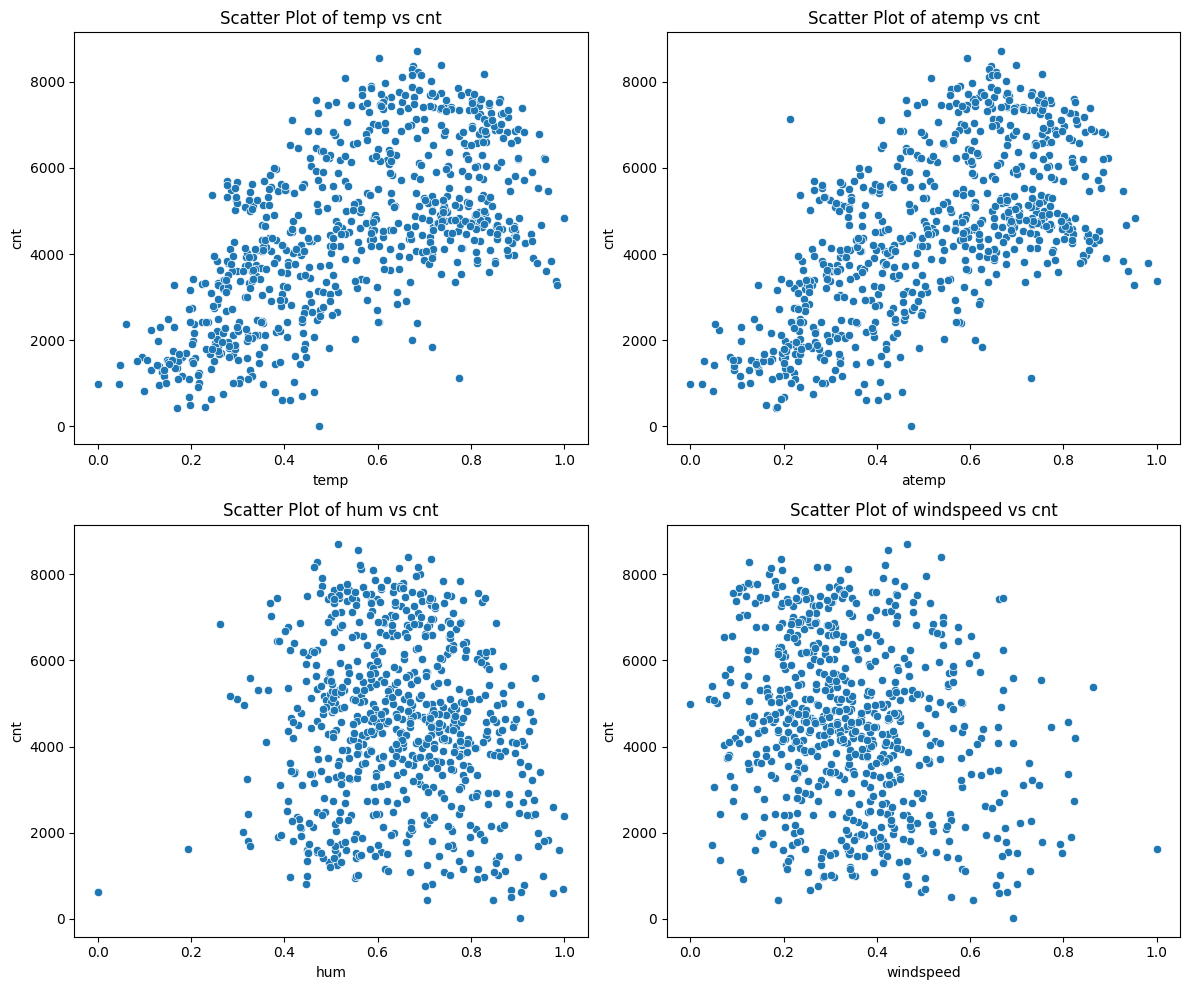

In [22]:
# Create individual scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create individual scatter plots in a 2x2 grid
for i, feature in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    sns.scatterplot(x=feature, y='cnt', data=subset_df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs cnt')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('cnt')

# Adjust layout
plt.tight_layout()
plt.show()

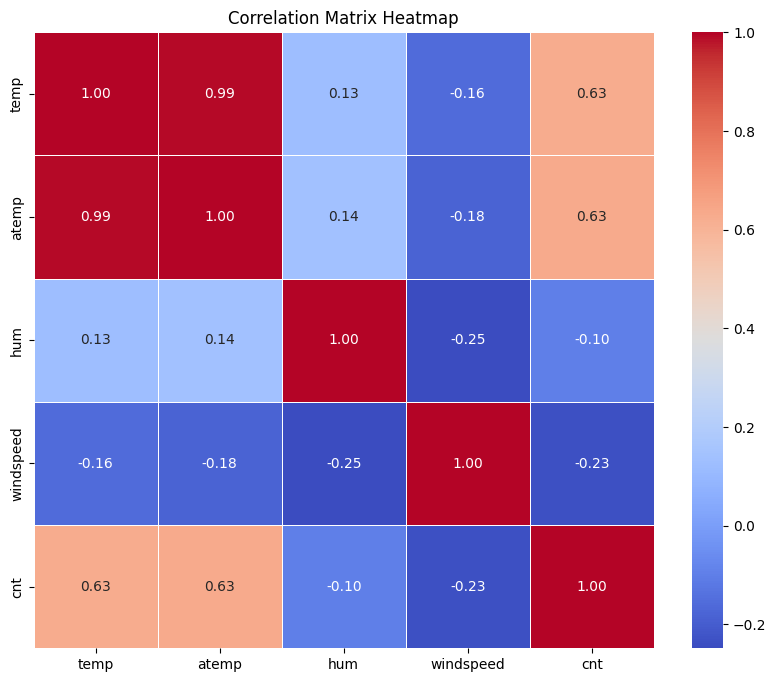

In [23]:
# Create heat map to better understanding

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 2.2 Development and Evaluation of a Linear Regression Model
Execute a comprehensive regression analysis on the Bike Sharing dataset to predict bike rental counts (cnt). This task involves selecting relevant features, preparing the data, training a linear regression model, making predictions, and evaluating the model's performance.

The detailed steps to be followed in this task are:

1. Feature Selection: Choose appropriate predictor variables for the regression model. These should include season, yr (year), mnth (month), holiday, weekday, workingday, weathersit, temp (temperature), atemp (feeling temperature), hum (humidity), and windspeed.
2. Data Preparation: Prepare the dataset for training and testing. Assign the selected features to X and the target variable, bike rental counts (cnt), to y. Then, split the dataset into training and testing sets using an 80-20 split ratio and a set random state for reproducibility.
3. Model Training: Utilize the Linear Regression algorithm from the scikit-learn library to train the model on the training data.
4. Making Predictions: Use the trained model to make predictions on the test dataset.
5. Model Evaluation: Evaluate the model's performance by calculating key metrics such as the R^2 Score and Root Mean Squared Error (RMSE). The R^2 Score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables, while RMSE provides a measure of the differences between values predicted by the model and the values actually observed.
The outcome of this task should be a well-trained Linear Regression model, along with a thorough evaluation of its predictive performance. All steps should be clearly documented, and findings should be reported with insights drawn from the performance metrics.

In [24]:
# List of predictor variables
predictor_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

# Create a new DataFrame with the selected predictor variables
predictors_df = df[predictor_variables]


predictors_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.355170,0.373517,0.828620,0.284606
1,1,0,1,0,0,0,2,0.379232,0.360541,0.715771,0.466215
2,1,0,1,0,1,1,1,0.171000,0.144830,0.449638,0.465740
3,1,0,1,0,2,1,1,0.175530,0.174649,0.607131,0.284297
4,1,0,1,0,3,1,1,0.209120,0.197158,0.449313,0.339143


In [25]:
# Now we are approaching the data prepartaion for linear regression
X = predictors_df
y = df['cnt']  # Assuming 'cnt' is the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (584, 11)
X_test shape: (147, 11)
y_train shape: (584,)
y_test shape: (147,)


In [26]:

# Create a Linear Regression model
bike_rent_model = LinearRegression()

# Train the model on the training data
bike_rent_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = bike_rent_model.predict(X_test)

# Display the predicted values
print("Predicted values:", y_pred)


Predicted values: [6220.41661215 1571.60576321 3043.96702808 4307.202484   6765.65907166
 7231.53610596  774.90414671 2139.60660149 7112.74560525 6458.99216879
 2899.5201142  2118.78223689 4072.24222313 5451.21298819 2384.53838592
 2016.2439965  2383.7195035  7428.59110259 5679.6292196  2937.10221986
 7227.78254419 8234.50574935 5165.55625478 1451.97184102 1387.04369852
 4823.52509835 1988.75354406 6734.347401   4119.29358364 5837.15376525
 3036.66424573 4139.63528134 5937.43110547 6342.47274127 5404.87712437
 4962.58370063 6846.78736318 6131.0685054  3109.86171354  949.91835773
 4072.37348276 3973.76905482 7237.99839055 3459.28530639 7251.23193173
 2229.24380584 5162.92102268 5008.88559433 6047.66305997 4162.60062637
 3360.0054502  2748.85624632 1929.2234449  5832.04867167 4919.07687036
 4274.71428393 4355.06976528 2469.63177749 3865.97854624 6921.22954642
 5315.69878923 6640.62621156 2043.89643836 7029.97704672 6013.41194267
 7244.54042696 7234.2541512  5397.07845745 1749.50545731 63

In [27]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

R^2 Score: 0.8276670090367211
Root Mean Squared Error (RMSE): 831.2851545662688


### 2.3 Clustering Analysis
Conduct a clustering analysis on the Bike Sharing dataset to uncover patterns and groupings within the environmental variables. The focus will be on the temperature (temp), feeling temperature (atemp), humidity (hum), and wind speed (windspeed) variables. This task involves several key steps, utilizing the KMeans clustering algorithm and evaluating the optimal number of clusters.

The analysis should proceed as follows:

1. *Feature Selection and Preparation:* Isolate the temp, atemp, hum, and windspeed features for clustering.
2. *Data Standardization:* Apply standard scaling to the selected features to normalize their range and variance, ensuring that each feature contributes equally to the clustering process.
3. *Determining Optimal Clusters:* Implement the silhouette method to find the optimal number of clusters. This involves running the KMeans algorithm with a varying number of clusters (from 2 to 10) and calculating the silhouette score for each. The silhouette score measures how similar an object is to its own cluster compared to other clusters.
4. *Silhouette Score Visualization:* Plot the silhouette scores against the number of clusters to visually determine the optimal cluster count.
5. *KMeans Clustering:* Perform KMeans clustering on the standardized data using the optimal number of clusters identified from the silhouette analysis.
6. *Integration with Original Data:* Append the cluster labels derived from KMeans to the original dataset, enabling further analysis based on the identified clusters.
The expected outcome is a well-defined set of clusters, each representing a unique combination of environmental conditions. The analysis should be presented with clear visualizations, particularly for the silhouette score plot, and detailed explanations of each step and its significance in the overall clustering process.

In [28]:
clustering_subset_features = df[['temp', 'atemp', 'hum', 'windspeed']]

# Display the first few rows of the subset
clustering_subset_features.head()


,temp,atemp,hum,windspeed
0,0.355170,0.373517,0.828620,0.284606
1,0.379232,0.360541,0.715771,0.466215
2,0.171000,0.144830,0.449638,0.465740
3,0.175530,0.174649,0.607131,0.284297
4,0.209120,0.197158,0.449313,0.339143


In [29]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
clustering_subset_features_scaled = scaler.fit_transform(clustering_subset_features)

# Display the first few rows of the scaled features
clustering_subset_features_scaled[:5]

array([[-0.82666213, -0.67994602,  1.25017133, -0.38789169],
       [-0.72109471, -0.74065231,  0.47911298,  0.74960172],
       [-1.63465665, -1.749767  , -1.33927398,  0.74663186],
       [-1.61477973, -1.61027025, -0.26318156, -0.38982855],
       [-1.46741392, -1.50497069, -1.34149414, -0.04630665]])

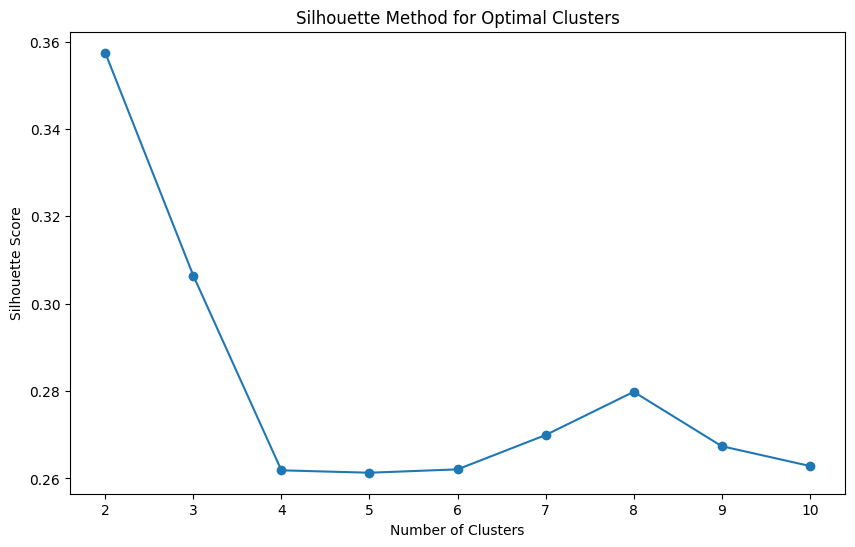

In [30]:
# Define a range of cluster numbers to test
cluster_range = range(2, 11)
silhouette_scores = []

# Iterate through different cluster numbers
for n_clusters in cluster_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model and predict cluster labels
    cluster_labels = kmeans.fit_predict(clustering_subset_features_scaled)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(clustering_subset_features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different cluster numbers
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

 We can take 2 as our chosen cluster number.

Cluster Centers:
[[-0.88864453 -0.88607649 -0.26437928  0.26553471]
 [ 0.81634012  0.81398103  0.24286811 -0.24392952]]
Cluster Counts:
cluster_label
1    381
0    350
Name: count, dtype: int64


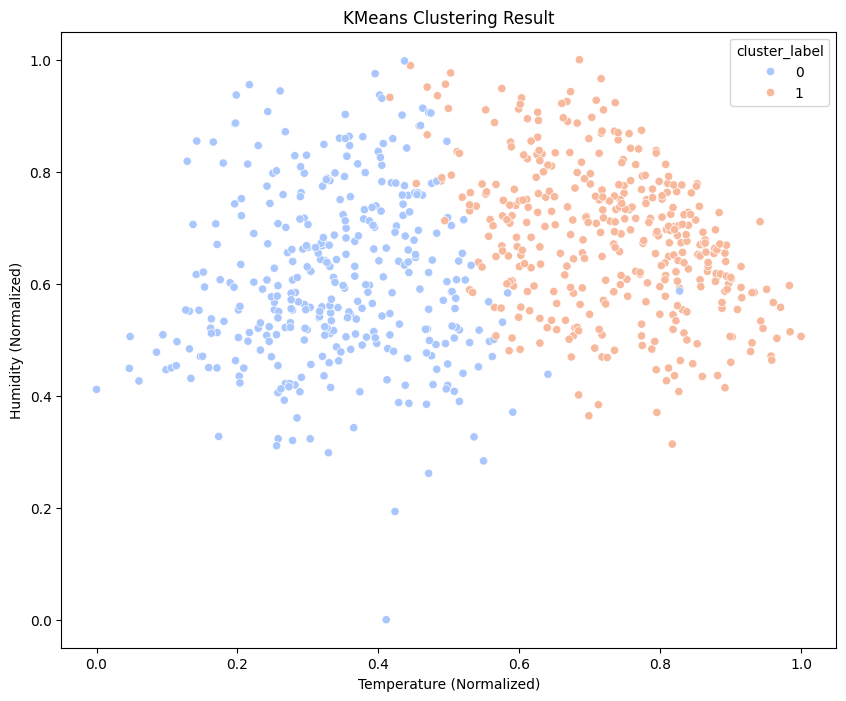

In [32]:
optimal_clusters = 2

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model and predict cluster labels
cluster_labels = kmeans.fit_predict(clustering_subset_features_scaled)

# Add the cluster labels as a new column in your dataframe
df['cluster_label'] = cluster_labels

# Display the cluster centers (centroids)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display the count of data points in each cluster
print("Cluster Counts:")
print(df['cluster_label'].value_counts())

# Visualize the clusters (you may choose different features based on your preference)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='temp', y='hum', hue='cluster_label', data=df, palette='coolwarm')
plt.title('KMeans Clustering Result')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Humidity (Normalized)')
plt.show()

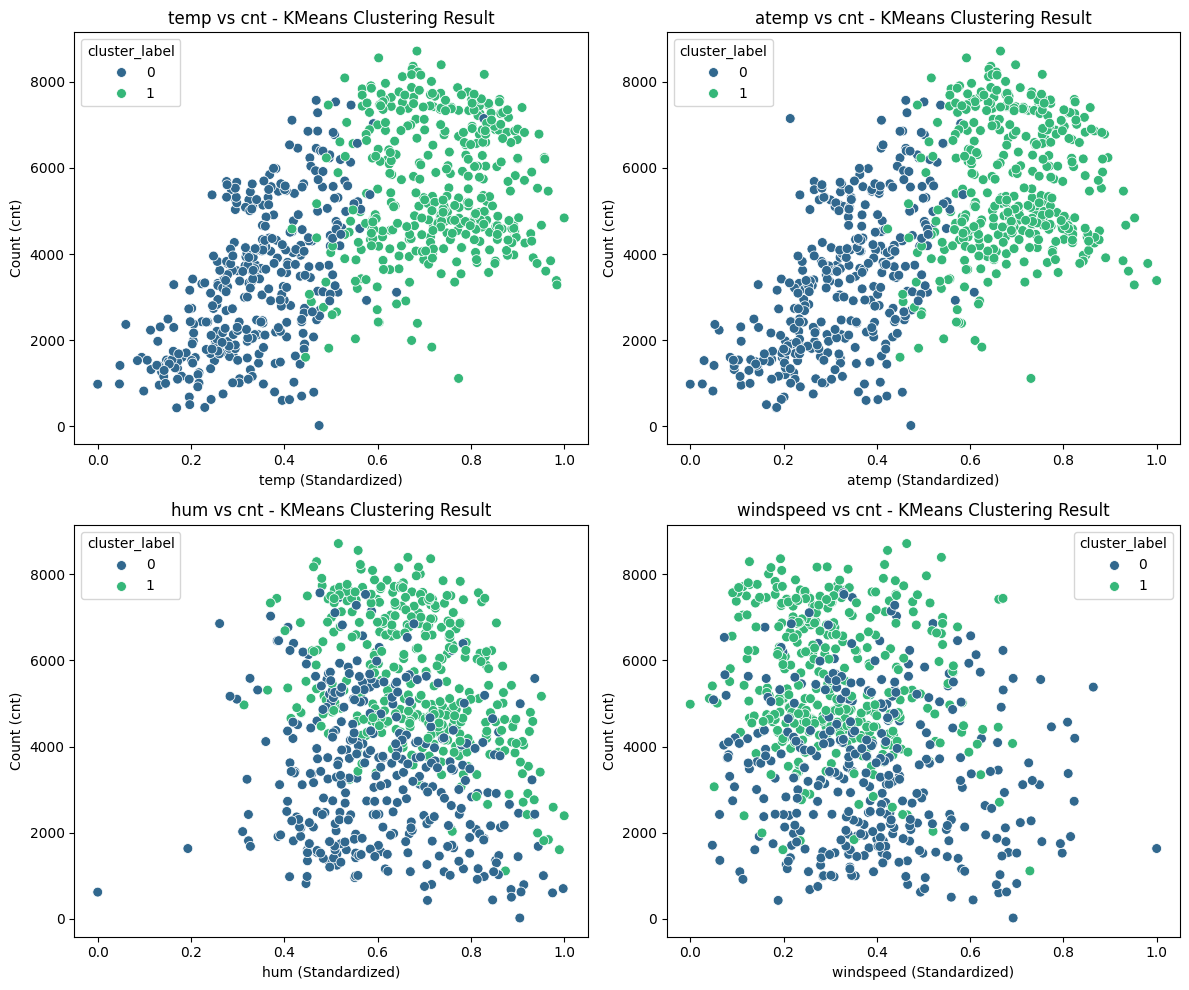

In [35]:
# List of features to visualize
features_to_visualize = ['temp', 'atemp', 'hum', 'windspeed']

# Set up a 2x2 grid for the scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each feature and create scatter plots
for i, feature in enumerate(features_to_visualize):
    # Scatter plot for the current feature against 'cnt'
    sns.scatterplot(x=feature, y='cnt', hue='cluster_label', data=df, palette='viridis', s=50, ax=axes[i])

    # Add labels and title
    axes[i].set_title(f'{feature} vs cnt - KMeans Clustering Result')
    axes[i].set_xlabel(f'{feature} (Standardized)')
    axes[i].set_ylabel('Count (cnt)')

 # Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 2.4 Visualizing Clustered Bike Rental Data Using Principal Component Analysis
Perform a dimensionality reduction and visualization on the previously clustered Bike Sharing dataset to better understand the clustering results. This task involves using Principal Component Analysis (PCA) to reduce the data to two dimensions and then creating a scatter plot to visualize the different clusters.

The specific steps to complete this task are:

1. Dimensionality Reduction with PCA: Implement Principal Component Analysis (PCA) to reduce the high-dimensional clustered data to two principal components. This step simplifies the dataset while retaining essential features necessary for understanding the clustering patterns.
2. Visualization of Clusters: After reducing the dimensions, use a scatter plot to visualize the clusters in this new two-dimensional space.
Plot Customization: Assign different colors to each cluster for clarity, label the axes as 'Principal Component 1' and 'Principal Component 2', and include a legend indicating the cluster numbers.
3. Interpretation of Results: Analyze the scatter plot to identify any distinct groupings or patterns that emerge among the clusters. Look for overlaps, distinct separations, or any other notable characteristics in the distribution of the clusters.

This task is aimed at providing a visual representation of the clustering results in a simpler, two-dimensional space, making it easier to interpret and analyze the relationships between different clusters. The outcome should be a clear and informative scatter plot that offers insights into the structure and distribution of the clustered data.

In [38]:
features_to_visualize = ['temp', 'atemp', 'hum', 'windspeed']

# Set up a 2x2 grid for the scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Perform PCA for each feature and create scatter plots
for i, feature in enumerate(features_to_visualize):
    # Extract the current feature for PCA
    X = df[[feature]]

    # Check if the feature has more than one dimension for PCA
    if X.shape[1] > 1:
        # Standardize the feature
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Apply PCA to reduce dimensionality to two principal components
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Apply KMeans clustering with 2 clusters on the PCA-transformed data
        kmeans = KMeans(n_clusters=2, random_state=42)
        cluster_labels = kmeans.fit_predict(X_pca)

        # Create a DataFrame with the reduced dimensions and cluster labels
        pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
        pca_df['cluster_label'] = cluster_labels

        # Scatter plot in the reduced space
        sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='viridis', s=50, ax=axes[i])

        # Add labels and title
        axes[i].set_title(f'{feature} - KMeans Clustering Result after PCA')
        axes[i].set_xlabel('Principal Component 1')
        axes[i].set_ylabel('Principal Component 2')

      else:
        # If the feature has only one dimension, create a simple scatter plot without clustering
        sns.scatterplot(x=feature, y='cnt', hue='cluster_label', data=df, palette='viridis', s=50, ax=axes[i])

        # Add labels and title
        axes[i].set_title(f'{feature} vs cnt - KMeans Clustering Result')
        axes[i].set_xlabel(f'{feature} (Standardized)')
        axes[i].set_ylabel('Count (cnt)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


SyntaxError: invalid syntax (<ipython-input-38-0c50ebc467dd>, line 40)